In [2]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#for ML stuff may use SVM stuff also
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from statistics import stdev 

## Read in truck 1 csv and select important columns for analysis. Use pandas parameters for possible speed boost.  


In [3]:
df_T1 = pd.read_csv('C:\\Users\\willi\\Desktop\\truck1.csv', index_col = "Time", usecols = ['Time',
 '4649_Ch1_Alternator_250A',
 '4649_Ch8_APU_BatteryVoltage'] ,engine = 'c', skip_blank_lines = True)


In [4]:
df_T1.head() 

4649_Ch1_Alternator_250A  4649_Ch8_APU_BatteryVoltage
Time                                                                          
08/07/2019 07:54:02.959                       NaN                          NaN
08/07/2019 07:54:03.059                       NaN                          NaN
08/07/2019 07:54:03.159                       NaN                          NaN
08/07/2019 07:54:03.259                       NaN                          NaN
08/07/2019 07:54:03.359                       NaN                          NaN

#### convert time col to datetime and view head of file, enough to view actual values.

In [5]:
df_T1.index = pd.to_datetime(df_T1.index)
print(df_T1.index)

DatetimeIndex(['2019-08-07 07:54:02.959000', '2019-08-07 07:54:03.059000',
               '2019-08-07 07:54:03.159000', '2019-08-07 07:54:03.259000',
               '2019-08-07 07:54:03.359000', '2019-08-07 07:54:03.459000',
               '2019-08-07 07:54:03.559000', '2019-08-07 07:54:03.659000',
               '2019-08-07 07:54:03.759000', '2019-08-07 07:54:03.859000',
               ...
               '2019-08-05 15:12:52.621000', '2019-08-05 15:12:52.721000',
               '2019-08-05 15:12:52.821000', '2019-08-05 15:12:52.921000',
               '2019-08-05 15:12:53.021000', '2019-08-05 15:12:53.121000',
               '2019-08-05 15:12:53.221000', '2019-08-05 15:12:53.321000',
               '2019-08-05 15:12:53.421000', '2019-08-05 15:12:53.521000'],
              dtype='datetime64[ns]', name='Time', length=1216689, freq=None)


In [6]:
list(df_T1.head())

['4649_Ch1_Alternator_250A', '4649_Ch8_APU_BatteryVoltage']

### describe the selected data

In [7]:
df_T1.info()
df_T1.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1216689 entries, 2019-08-07 07:54:02.959000 to 2019-08-05 15:12:53.521000
Data columns (total 2 columns):
4649_Ch1_Alternator_250A       1216197 non-null float64
4649_Ch8_APU_BatteryVoltage    1216197 non-null float64
dtypes: float64(2)
memory usage: 27.8 MB


4649_Ch1_Alternator_250A  4649_Ch8_APU_BatteryVoltage
count              1.216197e+06                 1.216197e+06
mean               4.143630e+01                 1.386995e+01
std                3.111164e+01                 2.840073e-01
min                2.274548e+00                 1.214054e+01
25%                2.269303e+01                 1.380865e+01
50%                2.715629e+01                 1.401144e+01
75%                4.763199e+01                 1.404532e+01
max                2.336585e+02                 1.413001e+01

In [8]:
date3days = df_T1["2019-08-05":"2019-08-07"]



In [9]:
print("***3 day describe***\n",date3days[['4649_Ch8_APU_BatteryVoltage','4649_Ch1_Alternator_250A']].describe())
print("\n______________________________________________________________________\n")


***3 day describe***
        4649_Ch8_APU_BatteryVoltage  4649_Ch1_Alternator_250A
count                950905.000000             950905.000000
mean                     13.842501                 41.727043
std                       0.303386                 30.472934
min                      12.140536                  3.304532
25%                      13.738613                 22.874228
50%                      14.006409                 27.375639
75%                      14.041657                 49.653811
max                      14.130007                232.475967

______________________________________________________________________



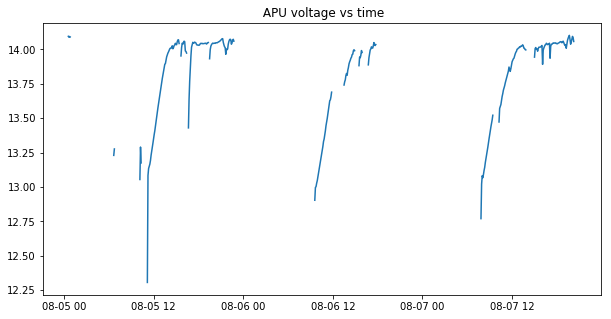

In [10]:
x1 = df_T1.dropna()
x1 = df_T1["2019-08-05":"2019-08-07"].resample("300S").mean()
x = x1.index
altAmps = x1[['4649_Ch1_Alternator_250A']]
y = x1[['4649_Ch8_APU_BatteryVoltage']]

plt.figure(figsize=(10,5))
plt.title(' APU voltage vs time')
plt.plot(x,y)



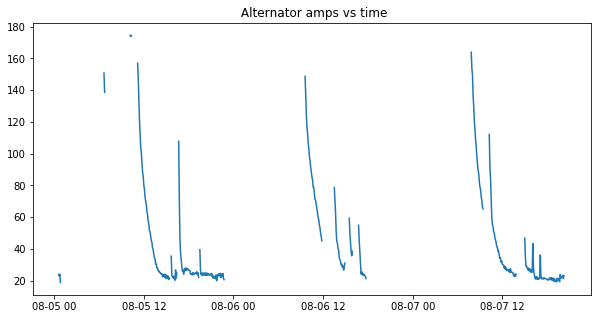

In [11]:
plt.figure(figsize=(10,5))
plt.title(' Alternator amps vs time')
ax = plt.plot(x,altAmps)


In [12]:
x1[['4649_Ch1_Alternator_250A','4649_Ch8_APU_BatteryVoltage']].describe()

4649_Ch1_Alternator_250A  4649_Ch8_APU_BatteryVoltage
count                339.000000                   339.000000
mean                  43.912469                    13.829520
std                   33.830828                     0.321042
min                   18.789823                    12.306884
25%                   23.282386                    13.712459
50%                   26.745130                    14.003543
75%                   51.042659                    14.042711
max                  174.505134                    14.102713

# scatter plots with regression line

Text(0.5, 1.0, 'Alternator Amps vs APU voltage')

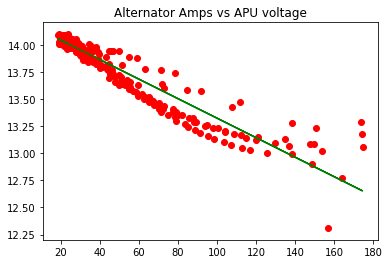

In [13]:
## plt.figure(figsize=(10,5))
x2=altAmps.dropna()
y2 = y.dropna()
linear_regressor = LinearRegression()  
linear_regressor.fit(x2, y2)  #linear reg
Y_pred = linear_regressor.predict(x2)
plt.xlabel='amps'
plt.scatter(x2,y2, color='red')
ax = plt.plot(x2,Y_pred, color='green')
plt.title('Alternator Amps vs APU voltage')

In [14]:
#logistic regression classifier
mldf = x1[['4649_Ch8_APU_BatteryVoltage','4649_Ch1_Alternator_250A',]].dropna()
#create a new col to show if battery is "fully charged or not"
mldf['APU_Voltage_Binary'] = (mldf['4649_Ch8_APU_BatteryVoltage']>14)*1
#going to try and predict what time of day the APU unit will be "charged"
logReg = LogisticRegression(solver='lbfgs')


In [15]:
mldf

4649_Ch8_APU_BatteryVoltage  4649_Ch1_Alternator_250A  \
Time                                                                         
2019-08-05 00:35:00                    14.095874                 23.670096   
2019-08-05 00:40:00                    14.089152                 22.727537   
2019-08-05 00:45:00                    14.094511                 24.042178   
2019-08-05 00:50:00                    14.091101                 18.789823   
2019-08-05 06:40:00                    13.230398                150.719783   
2019-08-05 06:45:00                    13.277175                138.602511   
2019-08-05 10:10:00                    13.054964                174.505134   
2019-08-05 10:15:00                    13.290930                173.713646   
2019-08-05 10:20:00                    13.175464                174.281225   
2019-08-05 11:10:00                    12.306884                156.989136   
2019-08-05 11:15:00                    13.084248                147.531024   
2019-08-05 11:20:00                    13.135081                134.892866   
2019-08-05 11:25:00                    13.151540                121.081226   
2019-08-05 11:30:00                    13.166564                112.485320   
2019-08-05 11:35:00                    13.193283                103.975773   
2019-08-05 11:40:00                    13.231584                100.400228   
2019-08-05 11:45:00                    13.260173                 94.679802   
2019-08-05 11:50:00                    13.289516                 88.288440   
2019-08-05 11:55:00                    13.320863                 85.540217   
2019-08-05 12:00:00                    13.353296                 79.908106   
2019-08-05 12:05:00                    13.382872                 77.769322   
2019-08-05 12:10:00                    13.410076                 72.388650   
2019-08-05 12:15:00                    13.444470                 69.668250   
2019-08-05 12:20:00                    13.478619                 67.368693   
2019-08-05 12:25:00                    13.516815                 63.319429   
2019-08-05 12:30:00                    13.545646                 61.622365   
2019-08-05 12:35:00                    13.576991                 57.103558   
2019-08-05 12:40:00                    13.608044                 55.748598   
2019-08-05 12:45:00                    13.639209                 51.481270   
2019-08-05 12:50:00                    13.670068                 50.813112   
...                                          ...                       ...   
2019-08-07 17:55:00                    14.042426                 20.909428   
2019-08-07 18:00:00                    14.042995                 20.913872   
2019-08-07 18:05:00                    14.041580                 20.296095   
2019-08-07 18:10:00                    14.046048                 20.268797   
2019-08-07 18:15:00                    14.047768                 20.935067   
2019-08-07 18:20:00                    14.050524                 21.643317   
2019-08-07 18:25:00                    14.055139                 20.600350   
2019-08-07 18:30:00                    14.057300                 21.845941   
2019-08-07 18:35:00                    14.054407                 20.343585   
2019-08-07 18:40:00                    14.048876                 21.675714   
2019-08-07 18:45:00                    14.055492                 20.105338   
2019-08-07 18:50:00                    14.060416                 21.425358   
2019-08-07 18:55:00                    14.050027                 19.494446   
2019-08-07 19:00:00                    14.037225                 20.915475   
2019-08-07 19:05:00                    14.028976                 19.340984   
2019-08-07 19:10:00                    14.035618                 19.739223   
2019-08-07 19:15:00                    14.008907                 19.178883   
2019-08-07 19:20:00                    14.037713                 21.415560   
2019-08-07 19:25:00                    14.0

In [29]:
#train test and split
X_train, X_test, y_train, y_test = train_test_split(mldf.iloc[:,:2],mldf.APU_Voltage_Binary, test_size = 0.2)

In [30]:
print(mldf.shape, "- full dataframe shape")
print(X_test.shape, "- Test(x) dataframe shape")
print(X_train.shape, "- Training(x) shape")
print(y_test.shape, "- Testing(y) shape")
print(y_train.shape, "- Testing(y) shape")

(339, 3) - full dataframe shape
(68, 2) - Test(x) dataframe shape
(271, 2) - Training(x) shape
(68,) - Testing(y) shape
(271,) - Testing(y) shape


In [31]:
#train classifier
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
#get some score values for 'accuracy'
logReg.score(X_train,y_train)

0.940959409594096

In [33]:
logReg.score(X_test,y_test)#this value shouls be less.

0.8676470588235294

In [34]:
trainscore = logReg.score(X_train,y_train)
testscore =logReg.score(X_test,y_test) #this value shouls be less.
print(trainscore-testscore)

0.07331235077056653


In [35]:
logReg.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0])

In [36]:
print(X_test)
X_test.to_csv("C:\\Users\\willi\\Desktop\\MLTestdata.csv")

                     4649_Ch8_APU_BatteryVoltage  4649_Ch1_Alternator_250A
Time                                                                      
2019-08-07 11:15:00                    13.793395                 41.340747
2019-08-07 19:30:00                    14.081594                 21.256991
2019-08-07 16:10:00                    13.995050                 27.671864
2019-08-05 11:50:00                    13.289516                 88.288440
2019-08-07 18:40:00                    14.048876                 21.675714
2019-08-07 20:10:00                    14.086861                 21.385214
2019-08-05 16:45:00                    13.637604                 71.853447
2019-08-05 22:35:00                    14.066735                 24.410852
2019-08-06 09:35:00                    12.904221                148.660016
2019-08-05 11:40:00                    13.231584                100.400228
2019-08-07 13:25:00                    14.034143                 24.961357
2019-08-05 16:40:00      

In [41]:
logReg.predict_proba(X_test) #Charged/NotCharged

array([[9.99982618e-01, 1.73824566e-05],
       [8.69124474e-03, 9.91308755e-01],
       [5.67938696e-01, 4.32061304e-01],
       [1.00000000e+00, 2.24537236e-21],
       [1.22176306e-02, 9.87782369e-01],
       [9.55600452e-03, 9.90443995e-01],
       [1.00000000e+00, 9.13247721e-16],
       [9.18741704e-02, 9.08125830e-01],
       [1.00000000e+00, 9.80310780e-42],
       [1.00000000e+00, 1.87058693e-25],
       [1.36447599e-01, 8.63552401e-01],
       [1.00000000e+00, 7.64291541e-28],
       [1.00000000e+00, 1.05713032e-27],
       [5.23006501e-02, 9.47699350e-01],
       [8.87343640e-01, 1.12656360e-01],
       [1.00000000e+00, 3.35511392e-10],
       [1.34879714e-02, 9.86512029e-01],
       [5.73807170e-01, 4.26192830e-01],
       [9.99945646e-01, 5.43542615e-05],
       [5.08846606e-01, 4.91153394e-01],
       [9.98641269e-01, 1.35873109e-03],
       [1.69261536e-01, 8.30738464e-01],
       [3.85618378e-01, 6.14381622e-01],
       [9.99997968e-01, 2.03235196e-06],
       [9.140617

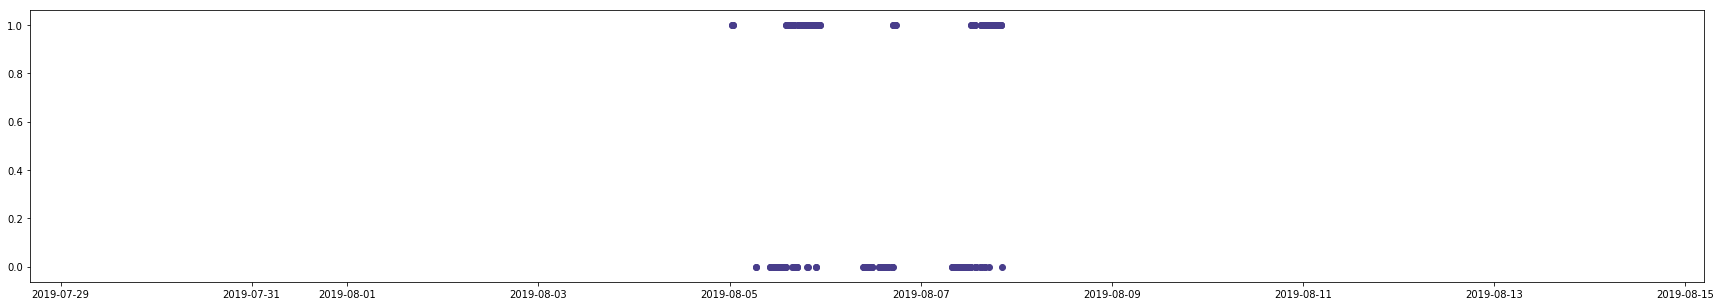

In [42]:

plt.figure(figsize=(30,5))
plt.scatter(mldf.index,mldf.APU_Voltage_Binary, color='darkslateblue')


In [43]:
from sklearn import metrics
Cmatrix = metrics.confusion_matrix(y_test, logReg.predict(X_test))
print(Cmatrix)

[[25  4]
 [ 5 34]]


In [44]:
print(metrics.classification_report(logReg.predict(X_test), y_test) ) 

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.87      0.89      0.88        38

   micro avg       0.87      0.87      0.87        68
   macro avg       0.87      0.86      0.87        68
weighted avg       0.87      0.87      0.87        68

